[1] 모듈 로딩 및 데이터 준비


In [1]:
import pandas as pd
import numpy as np
import utils 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'

- Excel 파일 CSV 파일로 변환

In [2]:
data = '../DATA/시도별 전출입 인구수.xlsx'
Deagu_Excel = pd.read_excel(data)

File = '../DATA/Deagu_CSV'

# 데이터 프레임으로 저장
Deagu_Excel = pd.DataFrame(Deagu_Excel)

# CSV 파일로 저장
Deagu_Excel.to_csv(File)

# CSV 파일 읽어오기기
Deagu_CSV = pd.read_csv('../DATA/Deagu_CSV')




데이터 정보확인 <hr>

In [3]:
utils.print_DF_Information(Deagu_CSV, 'Deagu_CSV')


Deagu_CSV 의 요약정보 =====


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  325 non-null    int64 
 1   전출지별        18 non-null     object
 2   전입지별        324 non-null    object
 3   1970        325 non-null    object
 4   1971        325 non-null    object
 5   1972        325 non-null    object
 6   1973        325 non-null    object
 7   1974        325 non-null    object
 8   1975        325 non-null    object
 9   1976        325 non-null    object
 10  1977        325 non-null    object
 11  1978        325 non-null    object
 12  1979        325 non-null    object
 13  1980        325 non-null    object
 14  1981        325 non-null    object
 15  1982        325 non-null    object
 16  1983        325 non-null    object
 17  1984        322 non-null    object
 18  1985        322 non-null    object
 19  1986        322 non-null 

- 0 번째 컬럼 Unnamed: 0 제거
- 전출지별 전입지별, 결측치 있음음
- 년도별 데이터 타입 object => int 변환

In [4]:
Deagu_CSV.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
utils.Check_cloums_index(Deagu_CSV, "Deagu_CSV")
        

Deagu_CSV의 columns =====
Index(['전출지별', '전입지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')
Deagu_CSV의 Index =====
RangeIndex(start=0, stop=325, step=1)
Deagu_CSV의 values =====
[[nan nan '이동자수 (명)' ... '이동자수 (명)' '이동자수 (명)' '이동자수 (명)']
 ['전국' '전국' '4046536' ... '7755286' '7378430' '7154226']
 [nan '서울특별시' '1742813' ... '1589431' '1515602' '1472937']
 ...
 [nan '경상북도' '374' ... '903' '931' '994']
 [nan '경상남도' '474' ... '1500' '1448' '1501']
 [nan '제주특별자치도' '9290' ... '59036' '66444' '63275']]
Deagu_CSV의 Shape =====
(325, 50)


1. 현재의 문제 데이터 프레임에서 전출지별에서 결측치 값이 생긴다. 

문제 생각 => 처음 나오는 문자열로 NAN 을 채우다가 다른 문자열이 나오면 그값으로 변경하고 빈칸나올때 까지 반복


In [6]:
# - 고유값 요약정보 
utils.printUniqueValue(Deagu_CSV)


[전출지별컬럼의 고유값]=====
갯수 :  18
[nan '전국' '서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시'
 '세종특별자치시' '경기도' '강원도' '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주특별자치도']

[전입지별컬럼의 고유값]=====
갯수 :  18
[nan '전국' '서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시'
 '세종특별자치시' '경기도' '강원도' '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주특별자치도']

[1970컬럼의 고유값]=====
갯수 :  146
['이동자수 (명)' '4046536' '1742813' '448577' '-' '452060' '160959' '100041'
 '192979' '136856' '177536' '407643' '212521' '14551' '1448985' '1232619'
 '11568' '130149' '9352' '6700' '15954' '10814' '10513' '11868' '8409'
 '1039' '376059' '24263' '307900' '6350' '2090' '1031' '1901' '1105'
 '2613' '7791' '20249' '766' '353535' '95388' '4983' '212365' '7649'
 '4424' '10743' '3221' '4287' '6171' '3916' '388' '197181' '34563' '4385'
 '16420' '113485' '7971' '3363' '1199' '1355' '10916' '3279' '245'
 '147916' '37625' '3840' '12585' '5741' '65127' '11611' '915' '3087'
 '5833' '1481' '71' '240241' '67033' '4803' '19969' '3384' '578

원하는 데이터만 출력 ==> 대구 광역시

In [7]:
Deagu_CSV = Deagu_CSV.loc[55:72]

In [8]:
Deagu_CSV

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,-,-,-,-,-,-,-,-,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,NaN,서울특별시,-,-,-,-,-,-,-,-,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,NaN,부산광역시,-,-,-,-,-,-,-,-,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,NaN,대구광역시,-,-,-,-,-,-,-,-,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,NaN,인천광역시,-,-,-,-,-,-,-,-,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,NaN,광주광역시,-,-,-,-,-,-,-,-,...,563,624,527,577,711,622,902,629,547,515
61,NaN,대전광역시,-,-,-,-,-,-,-,-,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,NaN,울산광역시,-,-,-,-,-,-,-,-,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,NaN,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,261,233,526,879,642,827
64,NaN,경기도,-,-,-,-,-,-,-,-,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [9]:
# - 고유값 요약정보 
utils.printUniqueValue(Deagu_CSV)


[전출지별컬럼의 고유값]=====
갯수 :  1
['대구광역시' nan]

[전입지별컬럼의 고유값]=====
갯수 :  18
['전국' '서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '세종특별자치시'
 '경기도' '강원도' '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주특별자치도']

[1970컬럼의 고유값]=====
갯수 :  1
['-']

[1971컬럼의 고유값]=====
갯수 :  1
['-']

[1972컬럼의 고유값]=====
갯수 :  1
['-']

[1973컬럼의 고유값]=====
갯수 :  1
['-']

[1974컬럼의 고유값]=====
갯수 :  1
['-']

[1975컬럼의 고유값]=====
갯수 :  1
['-']

[1976컬럼의 고유값]=====
갯수 :  1
['-']

[1977컬럼의 고유값]=====
갯수 :  1
['-']

[1978컬럼의 고유값]=====
갯수 :  1
['-']

[1979컬럼의 고유값]=====
갯수 :  1
['-']

[1980컬럼의 고유값]=====
갯수 :  1
['-']

[1981컬럼의 고유값]=====
갯수 :  15
['481534' '19760' '10590' '348566' '1440' '-' '4885' '3333' '1748' '2427'
 '1594' '1875' '70840' '14182' '294']

[1982컬럼의 고유값]=====
갯수 :  16
['521117' '23725' '10732' '393803' '1640' '0' '-' '6273' '3211' '1805'
 '2983' '1649' '1782' '58430' '14746' '338']

[1983컬럼의 고유값]=====
갯수 :  16
['582412' '32205' '10512' '438255' '1921' '0' '-' '8204' '3099' '1933'
 '3057' '1638' '1812' '63729' '

In [10]:
# 데이터 확인 결과 전처리 진행 --------------------------
# 데이터 값 타입 일치
# 이상치/특이값 처리

# 결측치 체크

Deagu_CSV.isna().sum()

전출지별    17
전입지별     0
1970     0
1971     0
1972     0
1973     0
1974     0
1975     0
1976     0
1977     0
1978     0
1979     0
1980     0
1981     0
1982     0
1983     0
1984     0
1985     0
1986     0
1987     0
1988     0
1989     0
1990     0
1991     0
1992     0
1993     0
1994     0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
dtype: int64

결측치 데이터 '-' 를 0으로 변환  => 값을 계산 하기 위해

In [11]:
Deagu_CSV=Deagu_CSV.replace('-', '0')
Deagu_CSV

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,NaN,서울특별시,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,NaN,부산광역시,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,NaN,대구광역시,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,NaN,인천광역시,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,NaN,광주광역시,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
61,NaN,대전광역시,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,NaN,울산광역시,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,NaN,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
64,NaN,경기도,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [12]:
# Deagu_CSV.iloc[:,2:] = Deagu_CSV.iloc[     :     ,     2:   ].astype('int')
Deagu_CSV[Deagu_CSV.columns[2:]] =  Deagu_CSV[Deagu_CSV.columns[2:]].astype('int')

In [13]:
Deagu_CSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 55 to 72
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    1 non-null      object
 1   전입지별    18 non-null     object
 2   1970    18 non-null     int64 
 3   1971    18 non-null     int64 
 4   1972    18 non-null     int64 
 5   1973    18 non-null     int64 
 6   1974    18 non-null     int64 
 7   1975    18 non-null     int64 
 8   1976    18 non-null     int64 
 9   1977    18 non-null     int64 
 10  1978    18 non-null     int64 
 11  1979    18 non-null     int64 
 12  1980    18 non-null     int64 
 13  1981    18 non-null     int64 
 14  1982    18 non-null     int64 
 15  1983    18 non-null     int64 
 16  1984    18 non-null     int64 
 17  1985    18 non-null     int64 
 18  1986    18 non-null     int64 
 19  1987    18 non-null     int64 
 20  1988    18 non-null     int64 
 21  1989    18 non-null     int64 
 22  1990    18 non-null     int

In [14]:
# 리스트를 만들어 년도 를 지정
year =  []
for col in Deagu_CSV.columns[2:]:
    year.append(col)

xData = year

# 대구지역만 추출한 데이터를 전입지별 만 추출출
df = Deagu_CSV.iloc[:,1:]

In [15]:

# 인덱스 재설정 => 년도별 숫자를 뽑아내기위해
df = df.set_index("전입지별")
df

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,0,0,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
서울특별시,0,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
대구광역시,0,0,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,0,0,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,0,0,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827


[4]컬럼 간 관계 시각화 <hr>

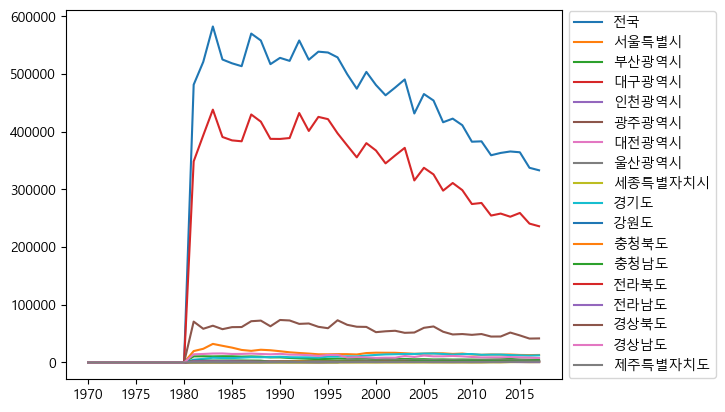

In [16]:

# # 인덱스 재설정 => 년도별 숫자를 뽑아내기위해
# df = df.set_index("전입지별")

# yData = df.iloc[2,1:]

# yData = df.loc['전국']
# plt.plot(xData, yData)
# plt.xticks(np.arange(0,50,5))
# plt.show()

# yData = df.loc['서울특별시']
# plt.plot(xData, yData)
# plt.xticks(np.arange(0,50,5))
# plt.show()

# yData = df.loc['서울특별시']
# plt.plot(xData, yData)
# plt.xticks(np.arange(0,50,5))
# plt.show()

# yData = df.loc['서울특별시']
# plt.plot(xData, yData)
# plt.xticks(np.arange(0,50,5))
# plt.show()
 
#  df 데이타프레임에서 
for i in df.index:
    yData = df.loc[i]
    plt.plot(xData, yData, label=f'{i}')


plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5)) 
plt.xticks(np.arange(0,50,5))
plt.show()

# 뭔 생각으로 작성한건지 다시 컴토 
# 생각이 꼬이는 이유

# plt.plot(xData, yData)sc
# for i in df:
#     yData = i
#     plt.plot(xData, yData)
# # plt.xticks(np.arange(0,50,5))
# # plt.title(f'{df.iloc[0,0]}' , fontdict={'weight':'bold', 'size':'x-large'})
#     plt.show()


# 원하는것 반복문을 돌려서 특정 행과 열을 데이터를 Y축에 저장하고싶다.
# 
# for i in df.iloc[:] :   
#     yDate = df[i,13:]
#     print(yDate)

#     plt.plot(xDate, yDate)
#     plt.show


이 데이터를 바탕으로 추론해낼수 있는 결론은

데이터 그래프 결과 전국적으로 인구유출 그래프는 높아보이지만 오류가 있다.

내부적으로 보면 대구에서 대구로 이동한 경우가 월등히 높아 타지역으로 유출됬어다고 보기에는 연관성이 많지 않다.

그러므로 전국데이터값은 총합이므로 데이터 신뢰성은 떨어진다.
